In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import generic_io
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [3]:
from langdetect import detect
import datefinder

## Preprocessing

In [4]:
tknzr = TweetTokenizer()

In [59]:
file_paths = ['veri/tweets/Italy-earthquake-day1-tweets1.jsonl',
                  'veri/tweets/Italy-earthquake-day1-tweets2.jsonl',
                  'veri/tweets/Italy-earthquake-day2-day3-tweets.jsonl',
                  'veri/tweets/NepalQuake-code-mixed-training-tweets.jsonl']

In [60]:
data_ = []
for fpath in file_paths:
    tmp_data = generic_io.load_from_file(fpath, file_format='jsonl')
    print(len(tmp_data))
    data_ += tmp_data

25000
27422
19443
18237


In [61]:
tweetlist = []
for item in exdata:
    if detect(item['text']) == 'en':
        item['text'] = re.sub("https?[^\s]*", "http://someurl", item['text'])
        item['text'] = re.sub("(?<!\w)@\w{1,15}(?!\w)", "@someuser", item['text'])
        #item['text'] = re.sub("\s\d*(\.|\:)?\d*\s", " digit ", item['text'])
        item['text'] = re.sub("(\d+(/|-)\d+(/|-)\d+)", " date ", item['text'])
        item['text'] = re.sub("\s\d?\d(:|,|.)\d\d\s?(A|a|P|p)(M|m)", " clock ", item['text'])
        item['text'] = re.sub('[\U0001f600-\U0001f650]', " emoticon", item['text'])
        tokenized_tweet = tknzr.tokenize(item['text'].lower())
        tweetlist.append(tokenized_tweet)

tweetlist = []
for item in data_:
    item['text'] = re.sub("https?[^\s]*", "http://someurl", item['text'])
    item['text'] = re.sub("(?<!\w)@\w{1,15}(?!\w)", "@someuser", item['text'])
    tokenized_tweet = tknzr.tokenize(item['text'])
    tweetlist.append(tokenized_tweet)

## W2V

In [8]:
# train model
model = Word2Vec(tweetlist, min_count=1)

In [12]:
# summarize the loaded model
print(model['earthquake'])

[-1.50711298  0.49692377 -1.21458304 -2.97600055 -0.79374552  1.62926006
  0.8734588   1.57857633 -0.82940096 -0.20546789 -0.82514679  3.29151487
 -1.14472508  0.00972831 -1.33814967 -0.49662572 -2.26512313  0.78944784
  1.40719438  0.68066543  0.66227162 -2.51331639  3.10125399  1.52434492
 -1.31501067 -0.52078557  3.58206606  0.7359156   0.91581082  1.81993282
  0.37842843 -0.49308228 -1.15280628 -1.43716931  2.14914584  2.59635401
  1.51150811  1.55111575  0.78456253  0.10414454  3.58640504  0.97522229
  0.30429736  0.01335961 -2.72159076 -2.34006739  1.27251375 -0.39631268
  0.30739817 -2.40115118 -1.02758408 -1.572294   -3.85446191 -0.54104912
 -0.6575979   2.01326489 -1.19511223 -0.42372051 -0.89252973  1.20363677
  0.93786281  3.5905478  -1.34787595  1.96364343  3.6384201  -1.76034415
  2.02868867 -0.49374989 -0.52650452 -2.70193028 -1.6498872   0.95453954
  1.27915502 -1.70401502 -1.10406697 -0.91523093  0.65051877 -0.32131013
  0.6396538  -0.04820509 -1.25471222 -1.22639692 -0

In [13]:
# summarize the loaded model
print(model['earthquakes'])

[-0.14714503 -0.31482434 -1.20894587 -1.14232826 -0.61567211  0.23642169
 -0.45797116  0.49472255 -0.72837424  0.2261744   0.02909294  0.57137072
  0.70292377 -0.18842691 -0.45693362  0.26163489 -1.10564733  0.67495549
  0.2515322  -0.07657269  0.58260483 -0.05837464  0.83001792 -0.43320608
 -0.15862048  0.25803298  1.48409653 -0.12167478 -0.45498902  0.41682112
 -0.54573941 -0.50872844 -1.10608566 -0.17510915  0.19236602  1.38843906
 -0.43285462  1.1747843   0.24968752 -0.4812119   1.75208879  1.20294535
 -0.67119235 -0.92304188 -0.33837527 -1.24748206  1.31022525 -0.08007338
  0.22558764 -0.62371284 -0.70157784 -0.2680026  -1.07125533  0.31233168
 -0.42572016  0.22027332 -0.3728264  -0.46824756 -0.33527389  0.05965862
  0.61968386  1.18102825 -0.90058631  0.17381833  0.38038906  0.07977683
  0.01848581 -0.84440553 -0.05530983 -1.36557543 -0.63006735  0.43496701
  1.05723071 -0.19118485 -0.19246919 -1.08709109 -0.00259586 -0.38833672
  0.34464148  0.20077261 -0.59020549  0.35796061  0

In [10]:
# save model
model.save('veri/models/w2v_model_earthquake_' + str(len(tweetlist)) + '.bin')

## t-SNE

In [11]:
# summarize vocabulary
words = list(model.wv.vocab)

In [9]:
vector_list = [] 
for w in words:
    vector_list.append(model[w])

In [11]:
X = np.array(vector_list)

In [16]:
tsne = TSNE(n_components=2, init='pca', random_state=0)

In [17]:
Y = tsne.fit_transform(X)

### Save t-SNE

In [65]:
generic_io.save_to_file(data_=Y, file_path='veri/tsne/tsne_vectors_eartquake_' + str(len(tweetlist)) + '.pickle')

In [84]:
tsne_df = pd.DataFrame(Y, columns=['x', 'y'])
tsne_df['word'] = words

In [85]:
tsne_df.to_csv('veri/tsne/tsne_eartquake_' + str(len(tweetlist)) + '.csv', index=False)

In [92]:
tsne_json = tsne_df.to_dict(orient='list')
generic_io.save_to_file(data_=tsne_json, file_path='veri/tsne_eartquake_for_chart.json')

## Plot

In [4]:
plt.figure(figsize=(30, 30))
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.get_cmap("jet", 30))
#plt.clim(15, 8)

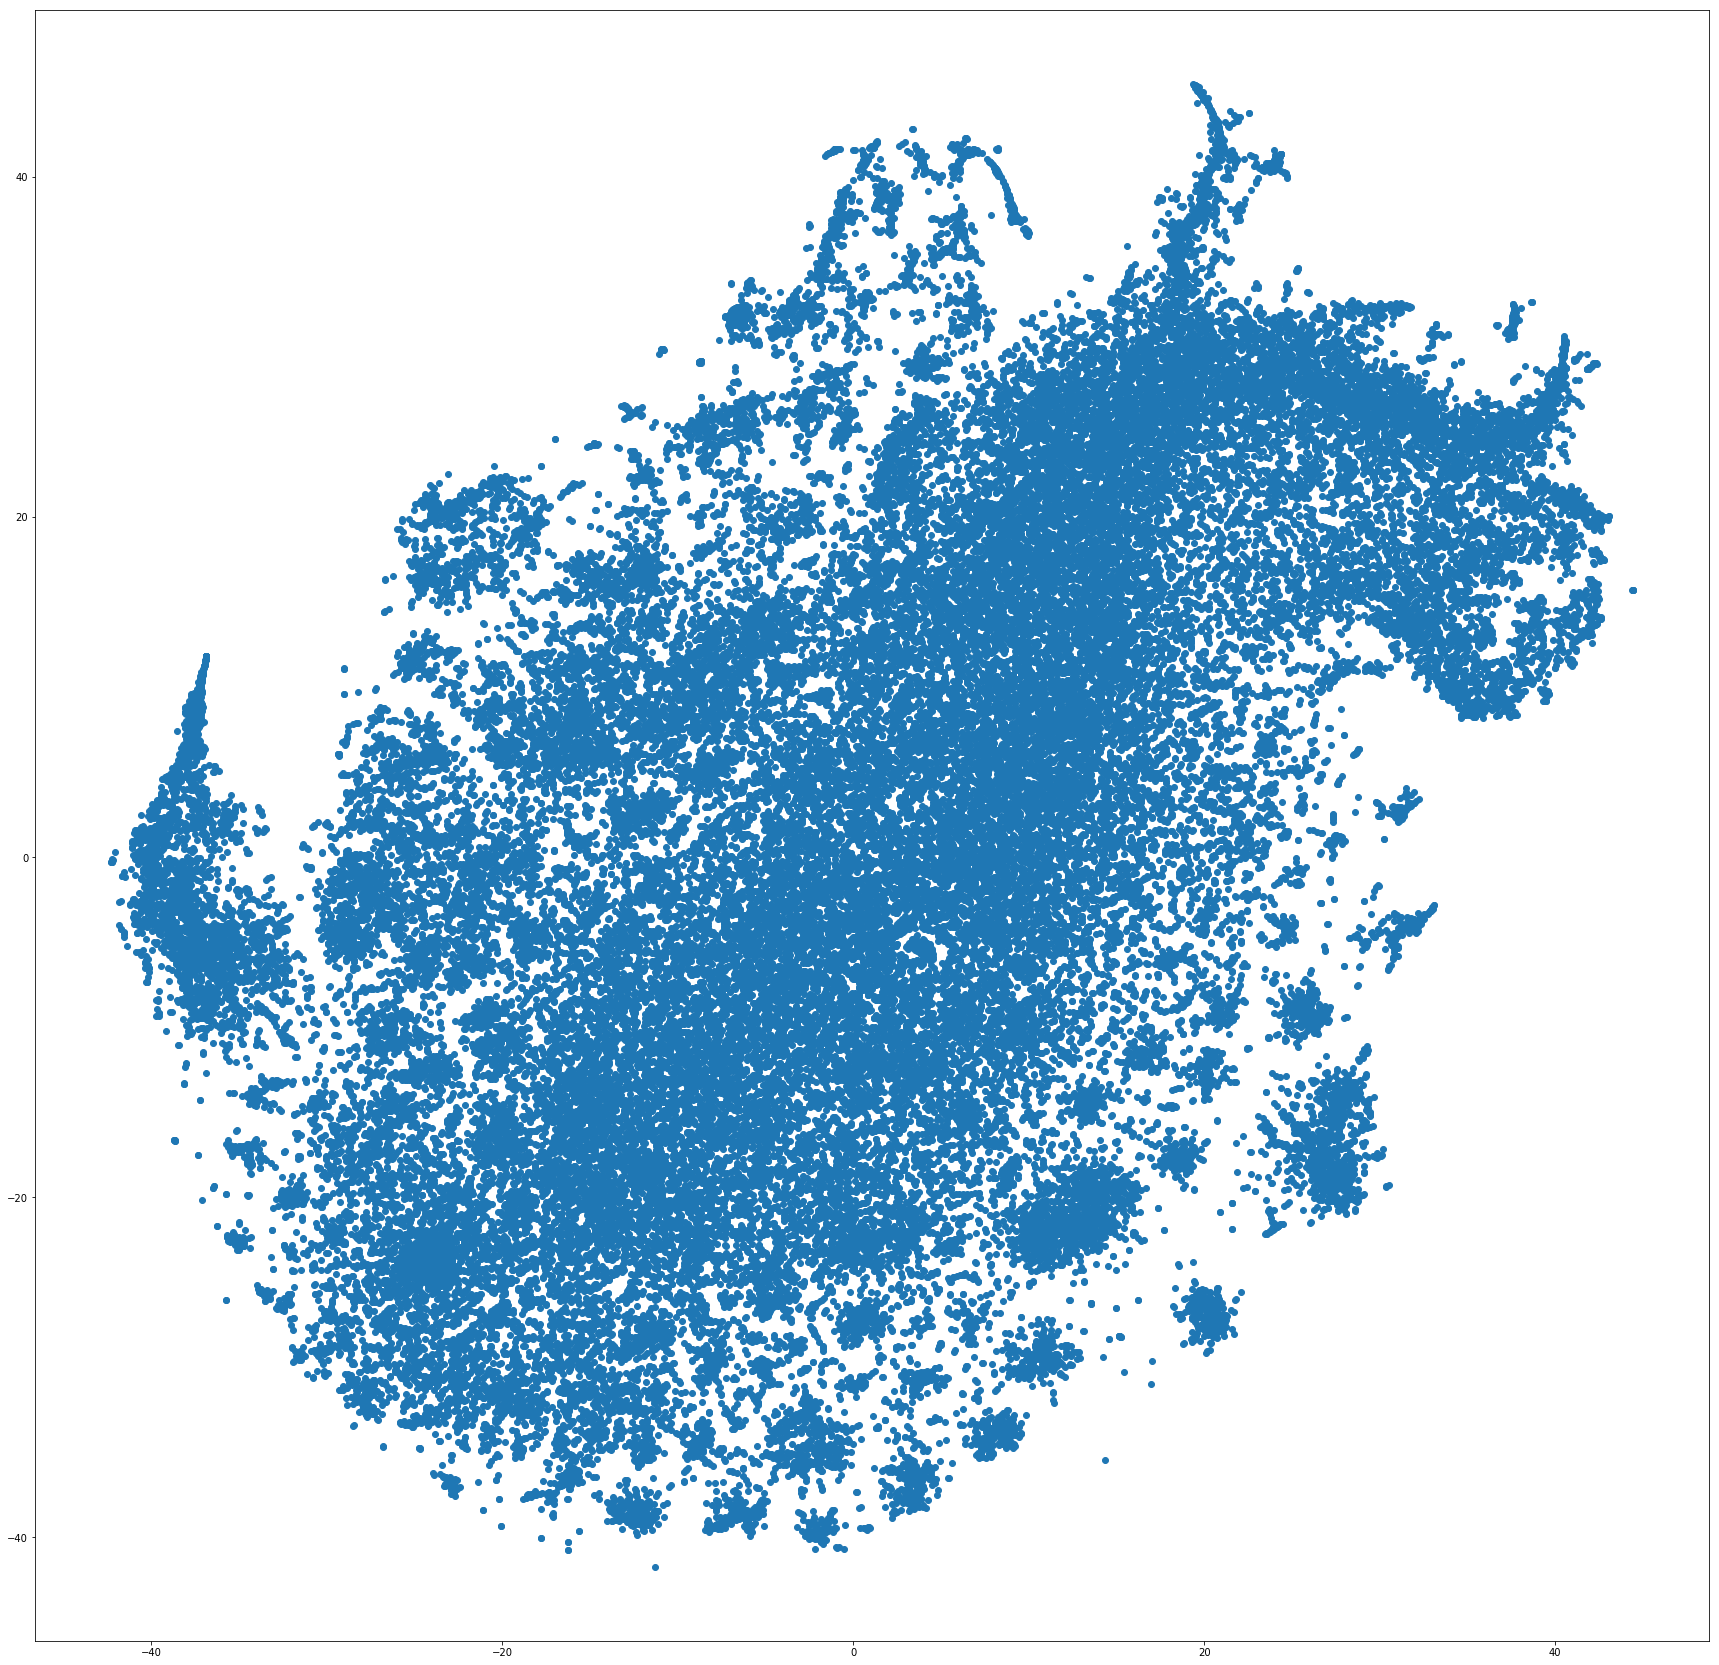

In [5]:
plt.show()

In [6]:
fig = plt.figure()
fig.savefig('veri/tsne/tsne_eartquake_90102.png')